# Kapittel 1 - Konsumentteori

Notatblokken lastes enklest ned på [https://github.com/uit-sok-1303-v26/uit-sok-1303.v26.github.io/blob/main/Konsumentteori%20-%20Kapittel%201.ipynb](https://github.com/uit-sok-1303-v26/uit-sok-1303.v26.github.io/blob/main/Konsumentteori%20-%20Kapittel%201.ipynb)



# Python repitisjon

## NumPy

NumPy er et bibliotek for numeriske beregninger i Python. Hovedsakelig blir vi kun å bruke NumPy til å lage arrays/tabeller og gjøre enkle matematiske operasjoner på disse.

np.linspace(start, stop, num) lager en array med `num` jevnt fordelte verdier mellom `start` og `stop`.

**Eksempel:**

In [1]:
import numpy as np
x = np.linspace(0, 10, 20)
print(x)

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


## Sympy

Sympy er et bibliotek for symbolsk matematikk i Python. Vi kommer til å bruke dette biblioteket til å derivere funksjoner og løse likninger symbolsk.

sp.symbols('x') definerer en symbolsk variabel x. Python kan da bruke denne variabelen i funksjoner og uttrykk.

**Eksempel:**

In [2]:
import sympy as sp
x = sp.symbols('x')

x

x

sp.Eq(lhs, rhs) lager en likning mellom lhs (left-hand side) og rhs (right-hand side).

**Eksempel:**

In [3]:
likning = sp.Eq(x**2 + 2*x + 1, 0)
likning

Eq(x**2 + 2*x + 1, 0)

sp.solve(likning, x) løser likningen for variabelen x.

**Eksempel:**

In [4]:
løsning = sp.solve(likning, x)[0] # 0 Henter første løsning hvis det er flere løsninger
løsning

-1

.subs metoden fra sympy kan brukes for å sette inn direkte verdier i et symbolsk uttrykk.

**Eksempel:**

In [5]:
x_verdi = x.subs(x, 2)
x_verdi

2

sp.diff(uttrykk, x) deriverer uttrykket med hensyn på variabelen x.

**Eksempel:**

In [6]:
likning_derivert = sp.diff(likning.lhs, x) # Her er vi kun interessert i venstresiden av likningen derfor vi bruker likning.lhs
likning_derivert

2*x + 2

Hovedsakelig blir vi å bruke disse funksjonene i hele kurset. Med kun disse funksjonene kan vi løse alle oppgaver i kurset. Matplotlib er en pakke som man må jobbe litt med for å forstå den.

Vi bruker matplotlib mye i notatblokkene, derfor er den beste måten å lære matplotlib på å se på eksemplene i notatblokkene og prøve å endre på dem for å se hva som skjer.


Vi skal se på konsumentens valg. 

Vi setter opp en modell for å forenkle virkelighet, og bak denne forenklingen ligger noen forutsetninger.      
1. Konsumenten velger mellom to goder som kan måles. Konsumentens preferanser er fast over tid.      
2. Nytten fra konsum er kun avhengig av eget konsum.     
3. Konsumenten tar priser for gitt, og har fullstendig informasjon om priser og egenskaper til begge godene.     
4. Sparing er ikke mulig. Det er heller ikke mulig å ta opp lån for å finansiere konsum.     
5. Konsumenten velger mellom goder for å maksimere sin egen nytte.     

(Dere vil møte modeller i senere kurs som ta bort én eller flere av disse forutsetningene).     

## 1. Konsumentens budsjettbetingelse

Konsumenten bruker hele sin inntekt (m) på konsum, noe som gjenspeiles i budsjettbetingelsen

$$I = p_AA + p_BB \tag{1}$$

hvor $p_A$, $p_B$ er prisen på bolig (B) og andre ting (A).      

For å tegne budsjettlinjen kan vi omforme budsjettbetingelsen slik at den står med:

$$A = \frac{I}{p_A} - \frac{p_B}{p_A}B \tag{2}$$


Dette er en rett linje som forteller at konsumenten kan kjøpe maksimalt $\frac{I}{p_A}$ enheter av gode A, og for hver enhet av gode B som kjøpes må konsumenten gi opp $\frac{p_B}{p_A}$ enheter av gode A. Da er $\frac{p_B}{p_A}$ den relative prisen på gode B, og helningen til budsjettlinjen er $-\frac{p_B}{p_A}$.        

Som eksempel kan vi anta at en student har en inntekt på $I=20000$ per måned og en pris på bolig $p_B=250$ og pris på annet konsum $p_A=400$



In [7]:
# Vi importerer pakkene som vi trenger
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

Vi skriver så inn $A = \frac{I}{p_A} - \frac{p_B}{p_A}B$ som en funksjon

In [8]:
# definerer budsjett
def budsjett(I, pB, pA, B):
    return I/pA - pB*B/pA

Vi benytter np.linspace for å lage en liste med verdier. Vi bruker her 100 verdier mellom 0.001 og 100 slik at python regner ut 100 punkter på budsjettlinjen. Vi starter listen fra 0.001 istedet for 0 for å unngå deling på null. 


In [9]:
x=np.linspace(0.001,100, 100)

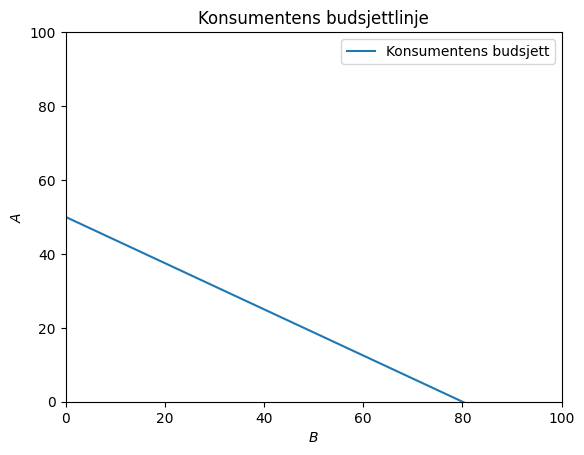

In [10]:
# tegn budsjettlinje og mulighetsområde

plt.xlabel('$B$')
plt.ylabel('$A$')

plt.xlim(0,100)
plt.ylim(0,100)

plt.plot(x, budsjett(20000, 250, 400, x), label = 'Konsumentens budsjett')


plt.title('Konsumentens budsjettlinje')
plt.legend(loc='best');

Konsumenten har mulighetsområdet under budsjettlinjen, altså alle kombinasjoner av A og B som tilfredsstiller budsjettbetingelsen. Vi kan illustrere dette ved å fylle området under budsjettlinjen med fill_between funksjonen.

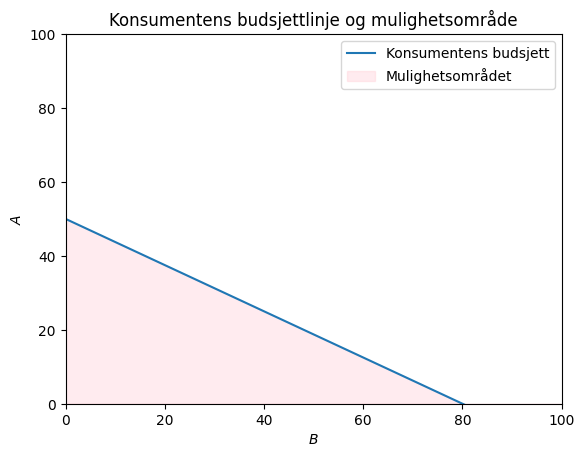

In [11]:
# tegn budsjettlinje og mulighetsområde

plt.xlabel('$B$')
plt.ylabel('$A$')

plt.xlim(0,100)
plt.ylim(0,100)

plt.plot(x, budsjett(20000, 250, 400, x), label = 'Konsumentens budsjett')

plt.fill_between(x, 0, budsjett(20000, 250, 400, x), color = "pink",alpha = 0.3,label='Mulighetsområdet')

plt.title('Konsumentens budsjettlinje og mulighetsområde')
plt.legend(loc='best');

For å lage flere figurer så hvor vi vil ha det samme oppsettet hver gang så vil vi benytte oss av en funksjon som lager aksene for oss

In [12]:
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('$A$', rotation=0)
                ax.set_xlabel('$B$')
    
    # Vi kan begrense aksene til 100 
                ax.set(xlim=(0,100))
                ax.set(ylim=(0,100))
                ax.spines['top'].set_color('none') #spines fjernes for å få et renere utseende
                ax.spines['right'].set_color('none')
                
                return fig, ax

Koden under lager samme figur som vist tidligere.

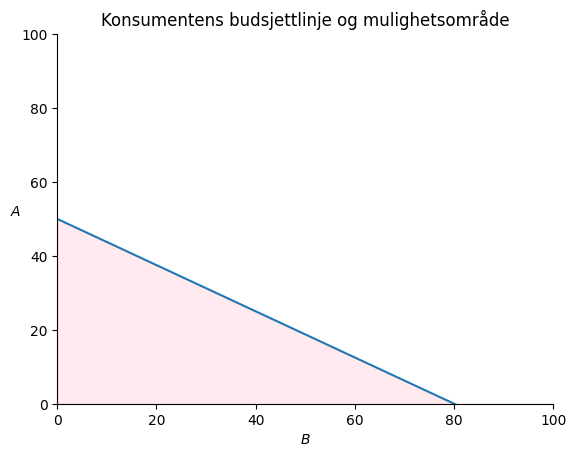

In [13]:
fig, ax = create_ax()
ax.plot(x, budsjett(20000, 250, 400, x), label = 'Konsumentens budsjett')
ax.fill_between(x, 0, budsjett(20000, 250, 400, x), color = "pink",alpha = 0.3,label='Mulighetsområdet')
ax.set_title('Konsumentens budsjettlinje og mulighetsområde');

Vi skal se på hva som skjer med budsjettbetingelsen og mulighetsområder ved endring i inntekt eller endring av pris
1. Inntekstøkning på kr 5000, slik at den nye inntekten per måned blir på kr 25 000


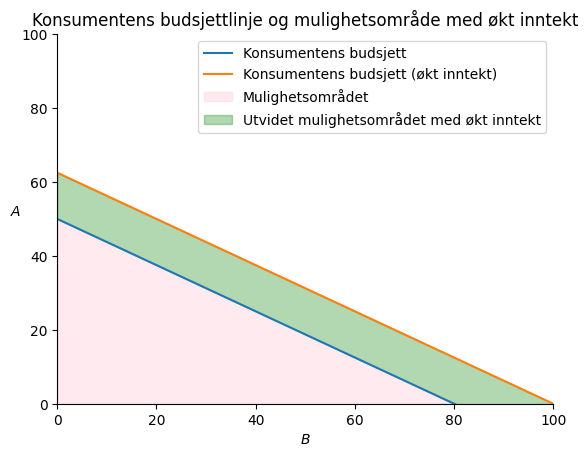

In [14]:
# (1) økning i inntekt
fig, ax = create_ax() #Det er også mulig å bruke create_ax funksjonen vi definerte tidligere

ax.plot(x, budsjett(20000, 250, 400, x), label = 'Konsumentens budsjett')
ax.plot(x, budsjett(25000, 250, 400, x), label = 'Konsumentens budsjett (økt inntekt)')

ax.fill_between(x, 0, budsjett(20000, 250, 400, x), color = "pink",alpha = 0.3,label='Mulighetsområdet')
ax.fill_between(x, budsjett(20000, 250, 400, x), budsjett(25000, 250, 400, x), color = "green",alpha = 0.3,label='Utvidet mulighetsområdet med økt inntekt')


ax.set_title('Konsumentens budsjettlinje og mulighetsområde med økt inntekt')
ax.legend(loc='best');

2. Prisøkning på bolig til kr 400 per måned

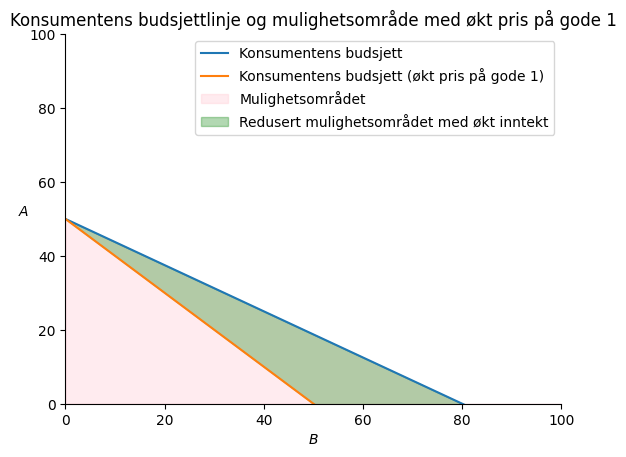

In [15]:
# (2) økning i pris på gode 1

fig, ax = create_ax()

ax.plot(x, budsjett(2000, 25, 40, x), label = 'Konsumentens budsjett')
ax.plot(x, budsjett(2000, 40, 40, x), label = 'Konsumentens budsjett (økt pris på gode 1)')

ax.fill_between(x, 0, budsjett(2000, 25, 40, x), color = "pink",alpha = 0.3,label='Mulighetsområdet')
ax.fill_between(x, budsjett(2000, 25, 40, x), budsjett(2000, 40, 40, x), color = "green",alpha = 0.3,label='Redusert mulighetsområdet med økt inntekt')


ax.set_title('Konsumentens budsjettlinje og mulighetsområde med økt pris på gode 1')
ax.legend(loc='best');


## Seminaroppgave 1

Her kan koden fra eksempelet over benyttes som utgangspunkt for å løse 1.2


## 1.2 Høyere strømpriser og endrede budsjettlinjer

Anne har en inntekt $I = 1$ som hun ønsker å bruke på mat $(A)$ og å bo i et godt oppvarmet hjem $(B)$. Prisen på mat og en varm bolig er i utgangspunktet gitt ved $P_A = P_B = 1$.

Anta at Anne har bestemt seg for å bruke like mye penger på bolig som på mat, slik at $P_A A = P_B B$. Dette betyr at hun bruker halvparten av inntekten sin på mat og halvparten på bolig.

### a) Vis Annes budsjettlinje i en figur og marker hennes valg av konsum.

## 1.2a Forslag til løsning

Vi definerer symboler for gode A og B, priser på gode A og B og vet at inntekten er 1. Vi kan da skrive opp budsjettbetingelsen som

$$
I = P_A \times A + P_B \times B 
$$

Vi setter opp at hun bruker like mye på begge godene

$$
P_A \times A = P_B \times B
$$

Og finner ut hva hun konsumerer av gode A og B ved å løse likningssettet bestående av budsjettbetingelsen og likningen over.

Hvis vi antar at prisene er $P_A = 1$ og $P_B = 1$, kan vi finne ut hva Anne konsumerer av gode A og B.

Likningoppsettet blir da forenklet:

$$
1 = A + B
$$

Vi vet at $ A = B$, så for å løse for A og B substituerer vi inn for hverandre:

$$
1 = A + A \rightarrow 1 = 2A \Rightarrow A = 0.5
$$

$$
1 = B + B \rightarrow 1 = 2B \Rightarrow B = 0.5
$$

I python kan vi både løse og illustrere dette.

In [16]:
# Vi begynner og definere symboler
A,B  = sp.symbols('A B')


# Vi lagrer I P_A og P_B_lav som variabler som er lik 1
I = 1
P_A = 1
P_B = 1


In [17]:
# Skriver inn budsjettlingingen 
Budsjett = sp.Eq(P_A*A + P_B*B, I) #For pris på mat ganger mengden mat + pris på klær ganger mengde klær skal være lik inntekt
Budsjett

Eq(A + B, 1)

In [18]:
# Vi setter opp at hun bruker like mye på begge godene
likt_forbruk = sp.Eq(P_A*A, P_B*B)
likt_forbruk

Eq(A, B)

In [19]:
# Finner løsningene for A og B
løsninger = sp.solve((Budsjett, likt_forbruk), (A, B))
løsning_a = løsninger[A]
løsning_b = løsninger[B]

display(løsning_a,løsning_b)

1/2

1/2

In [20]:
# For å visualisere trenger vi å vite budsjettlinjen
budsjettlinjen = sp.solve(Budsjett, A)[0]
budsjettlinjen

1 - B

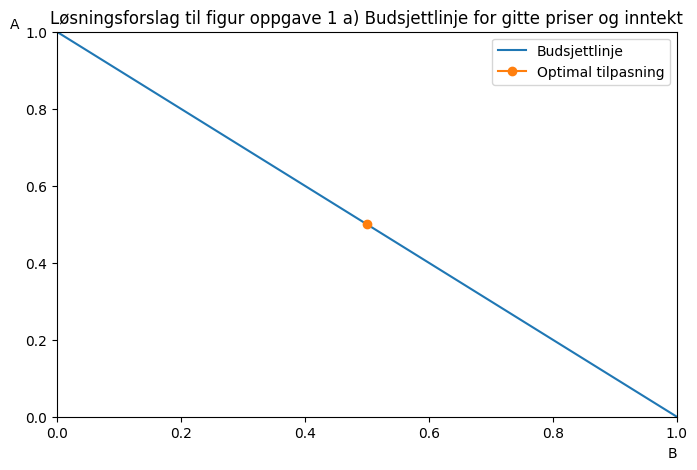

In [21]:
def budsj(B):
    return 1-B


# Visualisering av budsjettlinjen

fig, ax = plt.subplots(figsize=(8, 5))


ax.set_xlabel('B', loc='right')
ax.set_ylabel('A', loc='top', rotation=0)
ax.set_title('Løsningsforslag til figur oppgave 1 a) Budsjettlinje for gitte priser og inntekt')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)



# Lager verdier som kan legges inn for b for å vise budsjettlinjen
b_verdier = np.linspace(0, 1, 100)


ax.plot(b_verdier, budsj(b_verdier), label='Budsjettlinje')
# optimal tilpasning
ax.plot(løsning_a, løsning_b, marker='o', label='Optimal tilpasning') 
ax.legend();

### b) Anta så at prisen på strøm går opp slik at $P_B^{h} = 2$, hvor toppskrift "h" står for høy. Hva er helningen på den nye budsjettlinjen, og hva blir Annes tilpasning?

### c) Regjeringen innfører en strømstøtte som gjør at prisen som konsumentene betaler, blir akkurat som før. Støtten per enhet konsumert er dermed $S_B = P_B^{h} - P_B^{l} = 1$, hvor $P_B^{l}$ er den opprinnelige, lave prisen. Hva er den samlede kostnaden $S_B$ av denne strømstøtten, hvor $S_B = S_B  B$?

### d) Et alternativ til å gi prisstøtte kan være å gi en kontantstøtte til forbrukerne. Vis hvordan det å gi Anne en kontantstøtte $S$ (som er like stor som den hun skulle fått i strømsøtte, altså $S = S_B$) påvirker hennes budsjettlinje og tilpasning.

## 2. Konsumentens preferanser

Konsumenten ønsker å oppnå en glede eller tilfredsstillelse fra konsum, noe som måles i nytte. Modellen som brukes bygger på ordinal nytteteori som sier at vi kan rangere alternative godekombinasjoner, men har ikke et presist mål på nytteenheter eller hvor intenst vi liker noe. Da kan vi ikke foreta for eksempel nyttesammenlikninger mellom konsumenter.

#### Nyttefunksjonen

Nytten er ikke målbar i ordinal nytteteori, men vi kan bruke en funksjon for å representere konsumentens preferanser. Tenk at konsumenten får godekombinasjon A med nytte u(A)=20, eller godekombinasjon B med nytte u(B)=10. Det vi kan si er at nytten er størst med A så konsumenten velger den kombinasjonen. Vi kan ikke bruke tallene til å si at nytten av A er to ganger nytten av B. En generell nyttefunksjon som gir konsumentens preferanser over goder $A, B$ kan skrives som

$$ U = u(A, B)\tag {3}$$

Konsumentens preferanser (og dermed denne nyttefunksjonen) tenkes å ha følgende fornuftige egenskapene:      

*Fullstendig rangering* Konsumenten er i stand til å rangere alle ulike godekombinasjoner. Enten er A bedre enn B, B er bedre enn A eller konsumenten er indifferent (A og B gir like mye nytte).      
*Transitivitet* Tenk at u(A)>u(B) og u(B)>u(C). Da kan vi konkludere at A er foretrukket i forhold til C (fordi A er bedre enn B og B er bedre enn C).       
*Ikke-metning* Konsumenten foretrekker mer fremfor mindre av et gode. Gitt dette kan vi skrive følgende om **grensenytten** til godene:

$$ \frac{\partial U}{\partial A}=MU_A>0, \frac{\partial U}{\partial B}=MU_B>0\tag{4}$$

Grensenytten til gode *i* måler hvor mye nytten økes dersom konsumenten får en ekstra enhet av dette godet. Vi tenker at grensenytten avtar jo mer man har av et gode (dvs $MU'_A < 0, MU'_B <0$). Tenk at du har én time med fritid. Da vil én ekstra time med fritid verdsettes høyt. Om du har 16 timer fri vil du ikke sette så mye pris på den 17. time med fritid. Avtakende grensenytte altså.       
#### Indifferenskurver

Nyttefunksjonen viser sammenhengen mellom tre variabler (nytte og enheter av to goder). For å kunne tegne denne funksjonen i to dimensjoner må vi fastsette en verdi for én av variablene. Vi setter en fast verdi $U_1$ på nytte og skriver
$$U_1 = U(A, B)\tag{5}$$


Likning (3) viser kombinasjoner av $A, B$ som gir nøyaktig $U_1$ i nytte. Dette er en indifferenskurve, som viser konsumentens preferanser. Alle godekombinasjoner av godene $A$ og $B$ langs en indifferenskurve gir konsumenten samme nytte.


![Bilde](Picture1.png)


Figuren viser indifferenskurver for nyttenivå $U_1, U_2,U_3$. Godekombinasjon langs $U_1$ gir høyere nytte enn $U_2$, og $U_1$ gir høyest nytte for konsumenten.



For å beskrive helningen på en indifferenskurve benytter vi regelen for implisitt derivasjon. Med en funksjon $f(x,y)=c$, hvor c er en konstant får vi følgene uttrykk:

$$\begin{align}
-\frac{dx}{dy} &= \frac{\frac{\partial f}{\partial y}}{\frac{\partial f}{\partial x}}
\end{align}$$

Med nyttefunksjon $U(A,B)=U_1$, hvor nytten er konstant langs en indifferentskurve, får vi følgene uttrykket for helningen på indifferentskurven:

$$\begin{align}
-\frac{dA}{dB} &= \frac{\frac{\partial U}{\partial B}}{\frac{\partial U}{\partial A}}\tag {6}\\
\end{align}$$

Helningen på indifferneskurven kalles for "Den marginale subsitusjonsrate (MRS)", og den viser hvor villig konsumenten er villig til å bytte mellom godene. Fra (4) vet vi at: 

$$\frac{\partial U}{\partial A}=MU_A, \frac{\partial U}{\partial B}=MU_B$$

Og da kan MRS uttrykkes som:

$$MRS = \frac{MU_B}{MU_A}$$




#### Cobb-Douglas nyttefunksjon hvor eksponentene summeres til 1

Cobb-Douglas kan brukes til å illustrere preferanser:

$$U(A,B) = A^a B^{1-a}\tag {7}$$

Her er $a, (1-a)$ elastisiteter som uttrykker hvor mye konsumenten liker hvert av godene. Dersom hun får 1 prosent ekstra av gode A (B) økes nytten med a prosent (1-a) prosent. Vi skal nå bergene $MU_A$, $MU_B$ og $MRS$; se matteboks 1.1.

In [22]:
# definer symboler
A, B, a, b, U_0 =sp.symbols("A B a b U_0", real=True, positive=True)

# Nyttefunskjon med Cobb-Douglas
U=A**a*B**b
U

A**a*B**b

In [23]:
#  Definer nyttefunskjon med Cobb-Douglas
def nytte(A,B,a):
    return A**a*B**(1-a)
nytte(A,B,a)

A**a*B**(1 - a)

In [24]:
# grensenytten av gode A
MU_A=sp.simplify(sp.diff(nytte(A,B,a),A))
MU_A

A**(a - 1)*B**(1 - a)*a

In [25]:
# grensenytten av gode B
MU_B=sp.simplify(sp.diff(nytte(A,B,a),B))
MU_B

(A/B)**a*(1 - a)

In [26]:
# beregn MRS
MRS=sp.simplify(MU_B/MU_A)
MRS

A*(1 - a)/(B*a)

Vi  kan nå tegne denne nyttefunksjonen, hvor $a=0.5$ og vi kan se på ulike nyttenivåer.

In [27]:
# vi må løse for A og et gitt nyttenivå
A_ind_sol=sp.solve(U-U_0,A)[0]
A_ind_sol

U_0**(1/a)/B**(b/a)

In [28]:
# gjør om for å plotte

indiff_A=sp.lambdify( (U_0,a,b,B), A_ind_sol)
indiff_A(U_0,a,b,B)

U_0**(a**(-1.0))/B**(b/a)

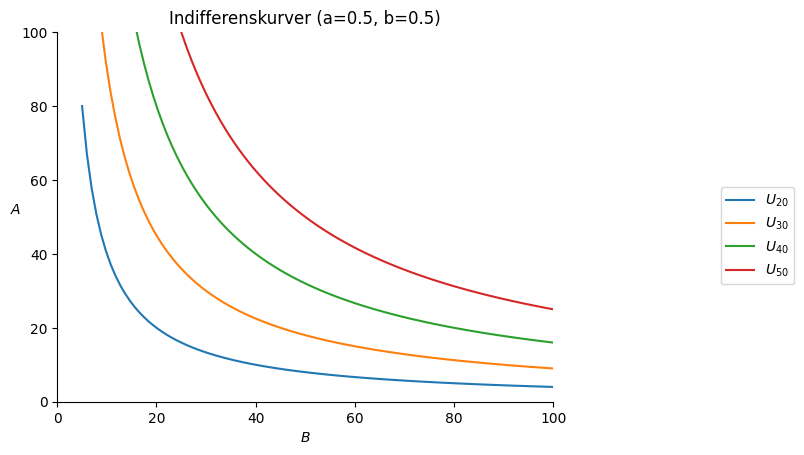

In [29]:
# tegne indifferenskurver for a= 0.5, b= 0.5, U_0 = {8,10,12}

x=np.linspace(5,100, 100)

fig, ax = create_ax()    

# plott funksjonen

for i in range (20, 60,10):
    ax.plot(x, indiff_A(i,.5,.5,x), label='$U_{%s}$' %i)


# tittel
ax.set_title('Indifferenskurver (a=0.5, b=0.5)')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));


### 3. Konsumentens tilpasning

Konsumenten ønsker maskimere sin nytte og da få mest mulig glede for pengene. 

Konsumenten maksimerer sin nytte gitt sitt budsjett:

$$maksimer_{A,B} \;\; U = U(A, B) \;\; gitt\;\; I=p_AA+p_BB$$

Dette løses ved hjelp av Lagrange metoden.         

Vi setter opp Lagrange funksjonen:

$$L = U(A, B)-\lambda (p_AA+p_BB-I)$$




hvor $\lambda$ er en Lagrange multiplikator som viser verdien av å gjøre bibetingelsen mindre streng. I dette tilfellet viser det økningen i nytten dersom vi øker intekten med 1kr. Vi deriverer $L$ med hensyn på $A$, $B$,$\>\lambda$:



$$\begin{align}
\frac{\partial L}{\partial A} &=\frac{\partial U}{\partial A} - \lambda p_A = 0 \tag {8}\\
\frac{\partial L}{\partial B} &= \frac{\partial U}{\partial B} - \lambda p_2 = 0 \tag {9}\\
\frac{\partial L}{\partial \lambda} &= p_AA - p_BB-I = 0 \tag {10}\\
\end{align}$$

Legg merke til at (10) innebærer at løsningen som vi finner må bruke hele budsjettet. Vi kan skrive om (8) og (9):

$$\begin{align}
\frac{MU_A}{p_A} &= \lambda\tag {11}\\
\frac{MU_B}{p_B} &= \lambda \tag {12}\\
\end{align}$$

Som innebærer at

$$
\frac{MU_A}{p_A}=\frac{MU_B}{p_B} \tag{13}
$$

Dette sier at konsumentens tilpasning fordeler inntekt på en slik måte at økningen i nytte fra den siste kronen brukt på gode A er lik økningen i nytte fra den siste kronen brukt på gode B. Vi kan skrive om (13) som følger

$$
MRS=\frac{MU_B}{MU_A}=\frac{p_B}{p_A} \tag{14}
$$


Tolkningen av (14) er at den relative prisen på gode B (høyre side) er lik den marginale substitusjonsbrøken (MSB).       

Å finne et maksimum for konsumenten betyr at vi må finne godekombinasjonen som er på budsjettlinjen hvor en indifferenskurve har samme helning som budsjettbetingelsen. Da må to likninger oppfylles samtidig:

$$\begin{align}
\frac{MU_B}{MU_A}=\frac{p_B}{p_A} \tag{14}\\
I=p_AA+p_BB \tag {1}\\
\end{align}$$

(14) sikrer at kombinasjonen av $A, B$ som velges maksimerer nytten, og (1) sikrer at denne kombinasjonen bruker hele budsjettet.

#### Cobb-Douglas preferanser med nyttefunksjon hvor eksponentene summeres til 1

Vi skal finne etterspørsel etter gode 1 og gode 2 for en konsument som har nyttefunksjon i (7) og budsjett i (1). Se matteboks 1.2 i boka.

In [30]:
# nye symboler
p_A, p_B, I =sp.symbols("p_A p_B I", real=True, positive=True)

# budsjett
bud=p_A*A+p_B*B


# Steg 1: Beregne MRS

MRS = sp.diff(U, B)/sp.diff(U, A)
display(MRS)

A*b/(B*a)

In [31]:
# Steg 1: Beregne MRS
MRS=sp.simplify(MU_B/MU_A)
MRS

A*(1 - a)/(B*a)

In [32]:
# Steg 2: setter MRS=PB/PA som i likning (14)

In [33]:
# Steg 3:Den optimale konsumkombinasjon for gode A finner vi ved å løse likning (14)

A_rel=sp.solve(MRS-p_B/p_A,A)[0]
display(A_rel)



-B*a*p_B/(p_A*(a - 1))

In [34]:
# Dette uttrykket sett inn i budsjettbetingelsen I og løs for B

budsj=bud.subs(A,A_rel)
display(budsj)
B_eq= sp.solve(budsj-I,B)[0]


-B*a*p_B/(a - 1) + B*p_B

In [35]:
# dette er likevektsløsning for B
display(B_eq)

I*(1 - a)/p_B

In [36]:
#sett inn i A_rel for å få A_eq
A_eq= A_rel.subs(B,B_eq)
display(A_eq)

-I*a*(1 - a)/(p_A*(a - 1))

In [37]:
sp.simplify(A_eq)

I*a/p_A

Da har vi etterspørsel etter gode som $B=\frac{(1-a)I}{p_B}$ og for gode $A=\frac{aI}{p_A}$. 

### Grafisk løsning

Oppskrift for å finne en grafisk løsning:        
1. Regn ut den optimale godekombinasjonen som ovenfor.        
2. Finn ut hvor mye nytte konsumenten oppnår ved å sette løsningen inn i U. Det er denne indifferenskurven som kommer til å tangere budsjettbetingelsen.      
3. Løs $U=U_0$ for $A$ for å finne likning til en indifferenskurve. Vi har kalt dette `A_ind_sol`. Gjør om til en funksjon som kan plottes med `sp.lambdify`.             
4. Bruk funksjonen til å tegne indifferenskurven for nyttenivået fra 2.     
5. Definer en funksjon for budsjettet, og tegne inn.      

Da burde du ha funnet et tangeringspunkt!


In [38]:
# steg 1 har vi løst A_eq og B_eq

# steg 2
U_max=U.subs([(A,A_eq),(B,B_eq)])
display(U_max)

(I*(1 - a)/p_B)**b*(-I*a*(1 - a)/(p_A*(a - 1)))**a

In [39]:
# Vi kan bruke tall i et oppslag for å regne numeriske verdier
# her er et eksempel
# la oss lage noen tall i et oppslag
#in_dict = {"a":0.5,"b":0.5,"I":20000,"p_B":250,"p_A":400}

# Vi bruker disse tallene til å finne nytten som oppnås samt etterspørsel

#nytte=sp.sympify(U_max).evalf(subs={a:in_dict['a'], b:in_dict['b'], I:in_dict['m'], p_B:in_dict['p_B'], p_A:in_dict['p_A']})
#x_1_num=sp.sympify(x_B_eq).evalf(subs={a:in_dict['a'], b:in_dict['b'], I:in_dict['I'], p_B:in_dict['p_B'], p_A:in_dict['p_A']})
#display(nytte)
#display(x_1_num)
#display(x_2_num)

In [40]:
# steg 3 
# vi har laget A_ind_sol som løsning
# og vi har laget en funksjon ved lambdify: indiff_A(U_0,a,b,B)

# Ta a=.5, b=.5, I=20000, p_B=250, p_A=400

# finn verdien for U_max, B_eq og A_eq

nytte = U_max.subs([(a,.5),(b,.5),(I,20000),(p_B,250),(p_A,400)])
B_num = B_eq.subs([(a,.5),(b,.5),(I,20000),(p_B,250),(p_A,400)])
A_num = A_eq.subs([(a,.5),(b,.5),(I,20000),(p_B,250),(p_A,400)])
display(nytte)
display(B_num)
display(A_num)

31.6227766016838

40.0000000000000

25.0000000000000

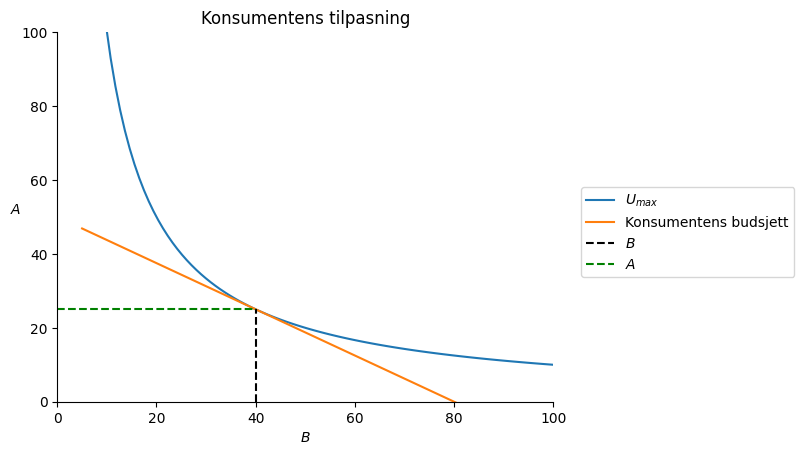

In [41]:
# nå kan vi plotte
fig, ax=create_ax()

# plott funksjonene


ax.plot(x, indiff_A(nytte,.5,.5,x), label='$U_{max}$')
ax.plot(x, budsjett(20000, 250, 400, x), label = 'Konsumentens budsjett')

# tegn inn tilpasningen

ax.vlines(float(B_num),0,float(A_num), color='black',ls='dashed', label='$B$')
ax.hlines(float(A_num),0,float(B_num), color='green',ls='dashed', label='$A$')
# tittel
ax.set_title('Konsumentens tilpasning')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

## Seminaroppgave 1.3 Anne og venninnen tilpasser seg ekte strømpriser

I oppgave 1.2 antok vi at Anne ønsket å bruke like mye penger på hvert gode. Nå skal vi gå litt mer formelt til verks. Anne og venninnen Beate sitter på en kafé og diskuterer smak og behag. 

Begge har preferanser gitt ved Cobb-Douglas nyttefunksjonen $U = A^{\alpha} B^{1-\alpha}$, hvor $A$ er mat og $B$ er en varm bolig. 

Anne bruker like mye penger på $A$ og $B$, mens venninnen bruker tre ganger så mye på bolig som på mat.

### a) Hva er nyttevekten $a$ til Anne, og hva med Beate?

### b) Prisen på de to godene er i utgangspunktet $P_B = P_A = 1$, og de to venninnene begge har en inntekt $I = 1$. Hva er deres konsum av $A$ og $B$? Regn ut og illustrer i en figur.

### c) Prisen på strøm øker så til $P_B^{h} = 2$. "Hvor mye har du skrudd ned varmen i leiligheten?" spør Anne. "Bruker du mindre penger på mat nå" lurer venninnen på. Hva er svaret ditt på disse spørsmålene?

## 1.4 Prisstøtte eller kontantstøtte?

Myndighetene diskuterer hvordan de kan hjelpe befolkningen i en tid med høye strømpriser. Anne har preferansene over mat $A$ og en varm bolig $B$ gitt ved $U = A^{0.5}B^{0.5}$ og hennes inntekt er $I = 1$.

Før prisøkningen kostet strømmen $P_B^{l} = 1$, men den har steget nå til $P_B{h} = 2$. Prisen på mat ligger fast, $P_A = 1$.

Forslaget fra myndighetene er å gi en prisstøtte som gjør at kundene møter akkurat samme pris som før. Du er nyansatt økonom i Finansdepartementet og argumenterer for at man heller bør gi denne støtten som en kontantstøtte. Bruk mikroøkonomisk teori, og Anne for eksempel, for å vise hvorfor du mener kontantstøtte er bedre.